In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rho = 0.5
q = 8
L = 100
dt = 1/1000
tmax = 500
tsteps = int(tmax/dt)

h = 1

In [21]:
# (i)
u = np.zeros((L, tsteps+1))
xi_0 = 20
u_0 = (q-1)/2 + np.sqrt(((q-1)/2)**2 - q*(1-rho)/rho)

for xi in range(L):
    u[xi,0] = u_0/(1+np.exp(xi-xi_0))
    
#plt.plot(u[:,0])

In [22]:
for tau in range(tsteps):
    
    for xi in range(L):
        if xi == 0 or xi == 99:
            u[xi, tau+1] = u[xi, tau] + dt*(rho*u[xi,tau]*(1-u[xi,tau]/q) - u[xi,tau]/(1+u[xi,tau]))
        else:
            u[xi, tau+1] = u[xi, tau] + dt*(rho*u[xi,tau]*(1-u[xi,tau]/q) - u[xi,tau]/(1+u[xi,tau]) + (u[xi+h, tau] + u[xi-h, tau] - 2*u[xi,tau])/h**2)

In [59]:
# (ii)
u2 = np.zeros((L, tsteps+1))
xi_0 = 50
u_0 = (q-1)/2 - np.sqrt(((q-1)/2)**2 - q*(1-rho)/rho)

for xi in range(L):
    u2[xi,0] = u_0/(1+np.exp(xi-xi_0))
    
#plt.plot(u2[:,0])

In [60]:
for tau in range(tsteps):
    
    for xi in range(L):
        if xi == 0 or xi == 99:
            u2[xi, tau+1] = u2[xi, tau] + dt*(rho*u2[xi,tau]*(1-u2[xi,tau]/q) - u2[xi,tau]/(1+u2[xi,tau]))
        else:
            u2[xi, tau+1] = u2[xi, tau] + dt*(rho*u2[xi,tau]*(1-u2[xi,tau]/q) - u2[xi,tau]/(1+u2[xi,tau]) + (u2[xi+h, tau] + u2[xi-h, tau] - 2*u2[xi,tau])/h**2)

In [75]:
# (iii)
u3 = np.zeros((L, tsteps+1))
xi_0 = 50
u_0 = 1.1*((q-1)/2 - np.sqrt(((q-1)/2)**2 - q*(1-rho)/rho))

for xi in range(L):
    u3[xi,0] = u_0/(1+np.exp(xi-xi_0))
    
#plt.plot(u3[:,0])

In [76]:
for tau in range(tsteps):
    
    for xi in range(L):
        if xi == 0 or xi == 99:
            u3[xi, tau+1] = u3[xi, tau] + dt*(rho*u3[xi,tau]*(1-u3[xi,tau]/q) - u3[xi,tau]/(1+u3[xi,tau]))
        else:
            u3[xi, tau+1] = u3[xi, tau] + dt*(rho*u3[xi,tau]*(1-u3[xi,tau]/q) - u3[xi,tau]/(1+u3[xi,tau]) + (u3[xi+h, tau] + u3[xi-h, tau] - 2*u3[xi,tau])/h**2)

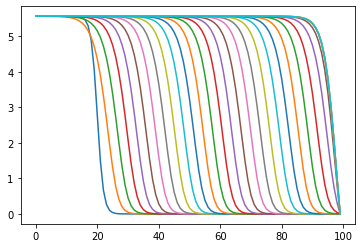

In [97]:
for i in np.linspace(0,tmax/dt,30):
    plt.plot(u[:,int(i)])

500000 [1.9998177  1.99994183 2.00006596 2.00019009]
218080
162388
55.692


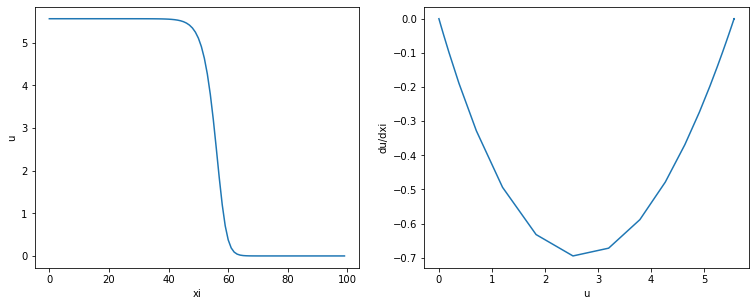

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.8, 4.8])

ax1.plot(u[:,200000])
ax1.set_ylabel('u')
ax1.set_xlabel('xi')

v = np.diff(u[:,200000])
ax2.plot(u[:-1,200000],v)
ax2.set_ylabel('du/dxi')
ax2.set_xlabel('u')       # byta axlar eller skitsamma??

print(np.argmax(u[60,:]>2))
print(np.argmax(u[50,:]>2))
print((np.argmax(u[60,:]>2)-np.argmax(u[50,:]>2))*dt)

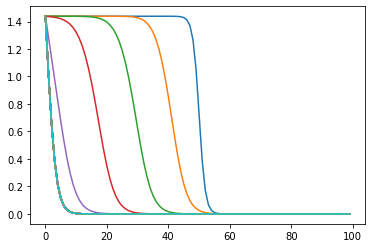

In [63]:
for i in np.linspace(0,tmax/dt,30):
    plt.plot(u2[:,int(i)])

-14.038


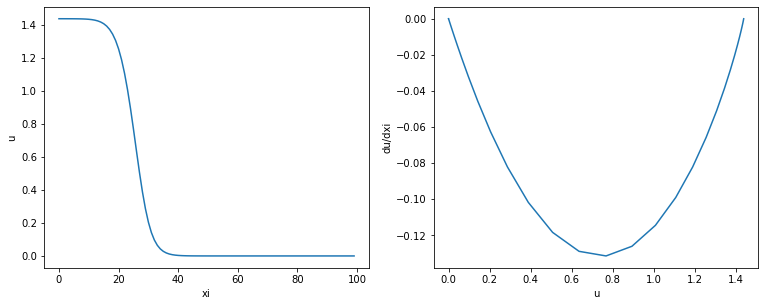

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.8, 4.8])

ax1.plot(u2[:,40000])
ax1.set_ylabel('u')
ax1.set_xlabel('xi')

v = np.diff(u2[:,40000])
ax2.plot(u2[:-1,40000],v)
ax2.set_ylabel('du/dxi')
ax2.set_xlabel('u')       # byta axlar eller skitsamma??

print((np.argmax(u2[30,:]<0.5)-np.argmax(u2[20,:]<0.5))*dt)

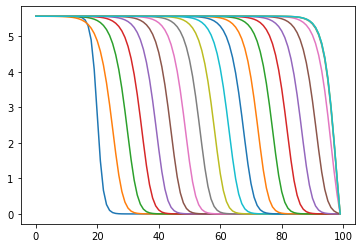

In [74]:
for i in np.linspace(0,tmax/dt,20):
    plt.plot(u3[:,int(i)])